<a href="https://colab.research.google.com/github/JSEFERINO/JHSERIES2/blob/main/15_Series_Tiempo_Cap13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio Series de Tiempo por Julio Hurtado Márquez**
## **Text: Time Series Forecasting in Python - MARCO PEIXEIRO**
# **Parte 3. Predicciones a gran escala con aprendizaje profundo**

## **Introducción**
+ Los modelos estadísticos tienen sus limitaciones, especialmente cuando un conjunto de datos es grande y tiene muchas características y relaciones no lineales.
+ En tales casos, el aprendizaje profundo es la herramienta perfecta para la previsión de series temporales.
+ En esta parte del libro, trabajaremos con un conjunto de datos masivo y aplicaremos diferentes arquitecturas de aprendizaje profundo, como **la memoria a corto plazo larga (LSTM), una red neuronal convolucional (CNN) y una red neuronal profunda autorregresiva, para predecir el futuro de nuestra serie**.
+ Nuevamente, concluiremos esta parte con un proyecto final para poner a prueba sus habilidades.
+ El aprendizaje profundo es un subconjunto del aprendizaje automático y, por lo tanto, es posible utilizar algoritmos de aprendizaje automático más tradicionales para la previsión de series temporales, como **árboles potenciados por gradiente**.
+ Para mantener esta sección razonable, no cubriremos esas técnicas específicamente, aunque se requiere la creación de ventanas de datos para pronosticar series temporales con aprendizaje automático, y aplicaremos este concepto numerosas veces.


# **13. Ventanas de datos y creación de líneas base para el aprendizaje profundo**

## **Esta parte de Este capítulo cubre**
+ Creación de ventanas de datos
+ Implementación de modelos de referencia para el aprendizaje profundo

## **Deep learning o aprendizaje profundo ideal para hacer pronosticos**
+ En el último capítulo, presenté el aprendizaje profundo para la previsión, cubriendo las situaciones en las que el aprendizaje profundo es ideal y describiendo los tres tipos principales de modelos de aprendizaje profundo: **de un solo paso, de varios pasos y de múltiples salidas**.
+ Luego, procedimos con la exploración de datos y la ingeniería de características para eliminar características inútiles y crear nuevas características que nos ayudarán a pronosticar el volumen de tráfico.
+ Una vez realizada esa configuración, ahora estamos listos para implementar el aprendizaje profundo para pronosticar nuestra variable objetivo, que es el volumen de tráfico.
+ En este capítulo, crearemos una clase reutilizable que creará ventanas de datos.
+ Este paso es probablemente el tema más complicado y más útil en esta parte del libro sobre aprendizaje profundo.
+ **La aplicación del aprendizaje profundo para la previsión se basa en la creación de ventanas de tiempo adecuadas y la especificación de las entradas y las etiquetas.**
+ Una vez hecho esto, verá que implementar diferentes modelos se vuelve increíblemente fácil y este marco se puede reutilizar para diferentes situaciones y conjuntos de datos.
+ Una vez que sepa cómo crear ventanas de datos, pasaremos a implementar modelos de referencia, modelos lineales y redes neuronales profundas.
+ Esto nos permitirá medir el rendimiento de estos modelos y luego podremos pasar a arquitecturas más complejas en los siguientes capítulos.

# **13.1 Creación de ventanas de datos**
+ Comenzaremos creando la clase DataWindow, que nos permitirá formatear los datos de manera adecuada para que se introduzcan en nuestros modelos de aprendizaje profundo.
+ También agregaremos un método de trazado a esta clase para que podamos visualizar las predicciones y los valores reales.
+ Sin embargo, antes de sumergirnos en el código y crear la clase DataWindow, es importante comprender por qué debemos crear ventanas de datos para el aprendizaje profundo.
+ Los modelos de aprendizaje profundo tienen una forma particular de ajustar los datos, que exploraremos en la siguiente sección. Luego, avanzaremos e implementaremos la clase DataWindow.

# **13.1.1 Exploración de cómo se entrenan los modelos de aprendizaje profundo para la previsión de series temporales**
+ En la primera mitad de este libro, ajustamos modelos estadísticos, como SARIMAX, a conjuntos de entrenamiento e hicimos predicciones.
+ En realidad, estábamos ajustando un conjunto de funciones predefinidas de un cierto orden (p,d,q)(P,D,Q)m, y descubrimos qué orden daba como resultado el mejor ajuste.
+ **Para los modelos de aprendizaje profundo, no tenemos un conjunto de funciones para probar**.
+ En cambio, dejamos que *la red neuronal derive su propia función de modo que cuando tome las entradas, genere las mejores predicciones posibles*.
+ **Para lograrlo, realizamos lo que se denomina ventanamiento de datos**.
+ Este es un proceso en el que definimos una secuencia de puntos de datos en nuestra serie temporal y definimos cuáles son entradas y cuáles son etiquetas. + De esa manera, el modelo de aprendizaje profundo puede ajustar las entradas, generar predicciones, compararlas con las etiquetas y repetir este proceso hasta que no pueda mejorar la precisión de sus predicciones.
+ Veamos un ejemplo de ventanamiento de datos.
+ **Nuestra ventana de datos utilizará 24 horas de datos para predecir las próximas 24 horas**.
+ Probablemente te preguntes por qué usamos solo 24 horas de datos para generar predicciones.
+ **Después de todo, el aprendizaje profundo consume muchos datos y se utiliza para grandes conjuntos de datos**.
+** La clave está en la ventana de datos. Una sola ventana tiene 24 pasos de tiempo como entrada para generar una salida de 24 pasos de tiempo.**
+ Sin embargo, todo el conjunto de entrenamiento está separado en múltiples ventanas, lo que significa que tenemos muchas ventanas con entradas y etiquetas, como se muestra en la figura 13.1.

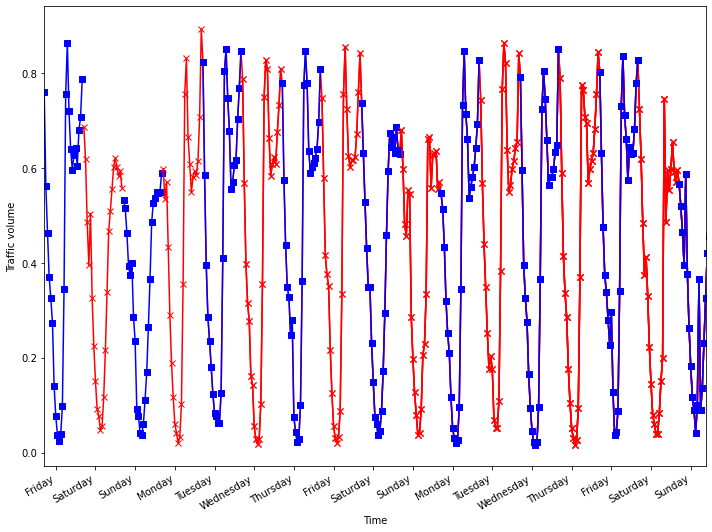

+ **Figura 13.1 Visualización de las ventanas de datos en el conjunto de entrenamiento. Las entradas se muestran con marcadores cuadrados y las etiquetas con cruces. Cada ventana de datos consta de 24 pasos de tiempo con marcadores cuadrados seguidos de 24 etiquetas con cruces.**

### **Acerca de la figura 13.1**
+ En la figura 13.1 puedes ver los primeros 400 pasos de tiempo de nuestro conjunto de entrenamiento para el volumen de tráfico.
+ Cada ventana de datos consta de 24 pasos de tiempo de entrada y 24 pasos de tiempo de etiqueta (como se muestra en la figura 13.2), lo que nos da una longitud total de 48 pasos de tiempo.
+ Podemos generar muchas ventanas de datos con el conjunto de entrenamiento, por lo que, de hecho, estamos aprovechando esta gran cantidad de datos.


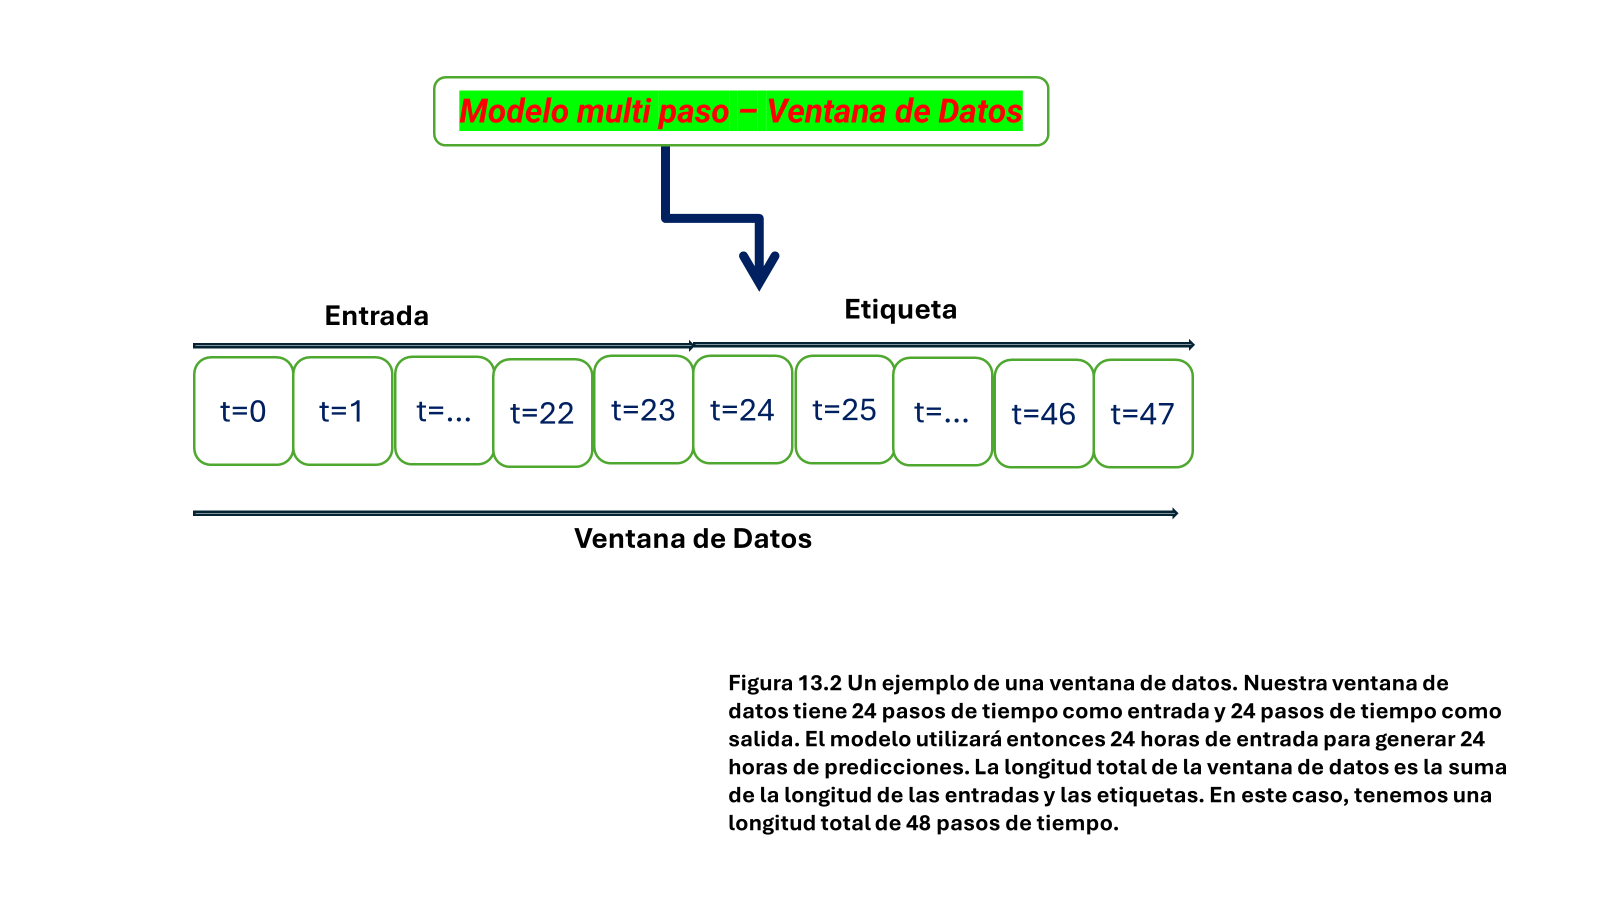


### **Acerca de la figura 13.2 y 13.3**
+ Como puede ver en la figura 13.2, la longitud total de la ventana de datos es la suma de las longitudes de cada secuencia.
+ En este caso, dado que tenemos 24 pasos de tiempo como entrada y 24 etiquetas, la longitud total de la ventana de datos es de 48 pasos de tiempo.
+ Puede pensar que estamos desperdiciando una gran cantidad de datos de entrenamiento, ya que en la figura 13.2 los pasos de tiempo 24 a 47 son etiquetas.
+ ¿Esas nunca se van a utilizar como entradas?
+ Por supuesto que sí. La clase DataWindow que implementaremos en la siguiente sección genera ventanas de datos con entradas que comienzan en t = 0.
+ Luego creará otro conjunto de ventanas de datos, pero esta vez comenzando en t = 1.
+ Luego comenzará en t = 2.
+ Esto continúa hasta que no pueda tener una secuencia de 24 etiquetas consecutivas en el conjunto de entrenamiento, como se ilustra en la figura 13.3..

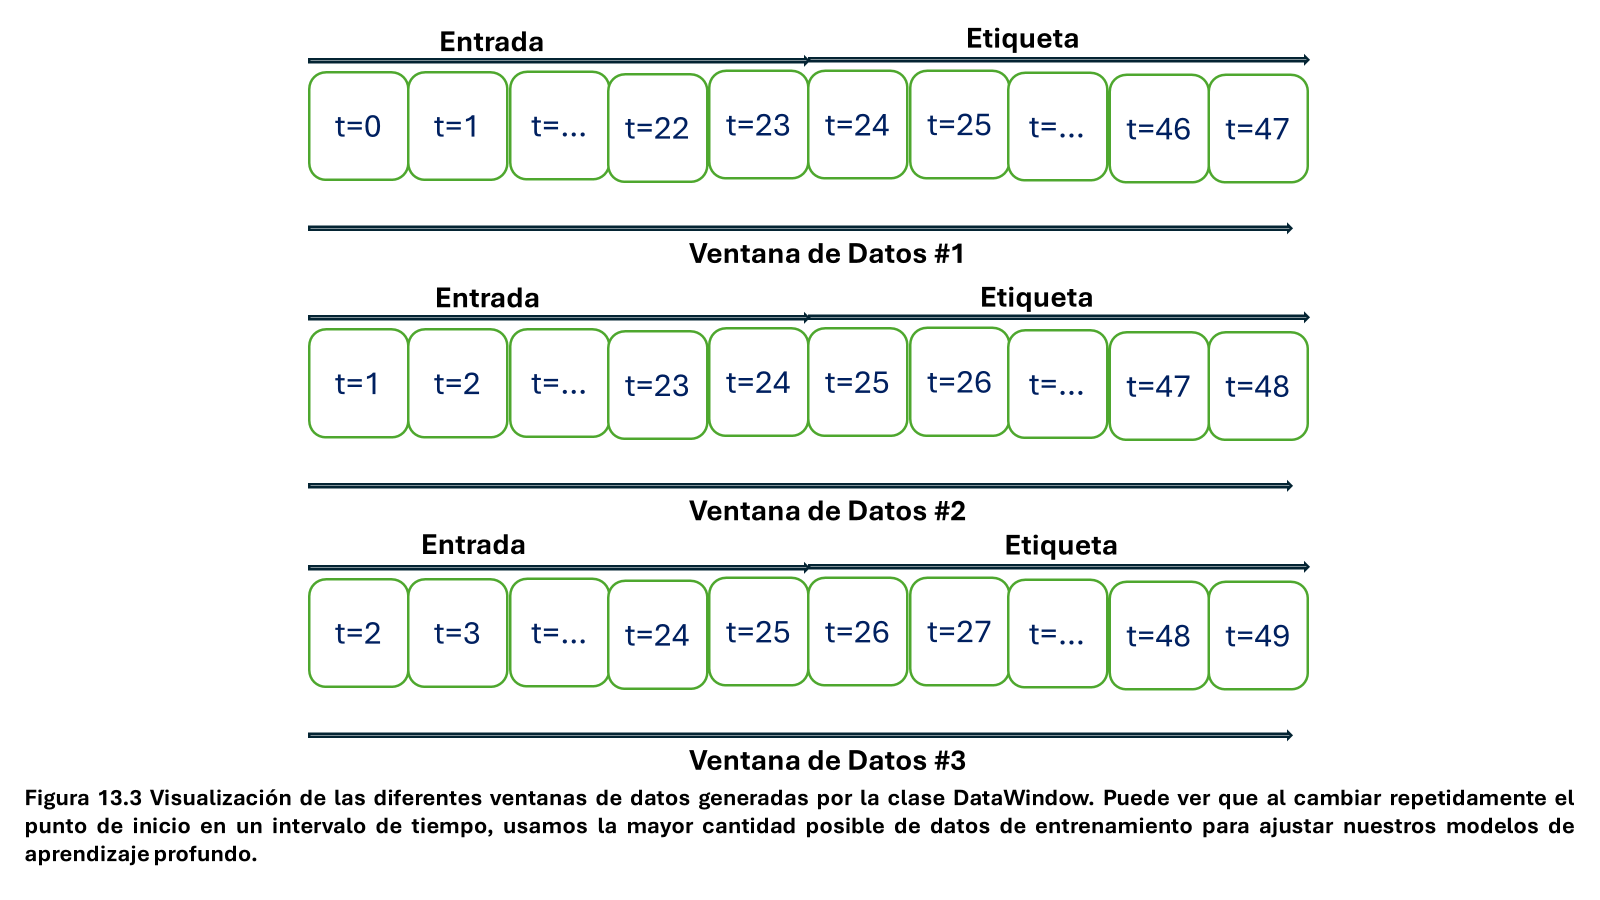

##  **Para que el cálculo sea más eficiente, los modelos de aprendizaje profundo se entrenan con lotes**.
+ Un lote es simplemente una colección de ventanas de datos que se introducen en el modelo para el entrenamiento, como se muestra en la figura 13.4.
+ La figura 13.4 muestra un ejemplo de un lote con un tamaño de lote de 32.
+ Eso significa que se agrupan 32 ventanas de datos y se utilizan para entrenar el modelo.
+ Por supuesto, se trata de un solo lote: la clase DataWindow genera tantos lotes como sea posible con el conjunto de entrenamiento dado.
+ *En nuestro caso, tenemos un conjunto de entrenamiento con 12285 filas. Si cada lote tiene 32 ventanas de datos, eso significa que tendremos $12285/32 = 384$ lotes.
+ **El entrenamiento del modelo en los 384 lotes una vez se denomina una época.**
+ **Una época a menudo no da como resultado un modelo preciso, por lo que el modelo se entrenará durante tantas épocas como sea necesario hasta que no pueda mejorar la precisión de sus predicciones**.



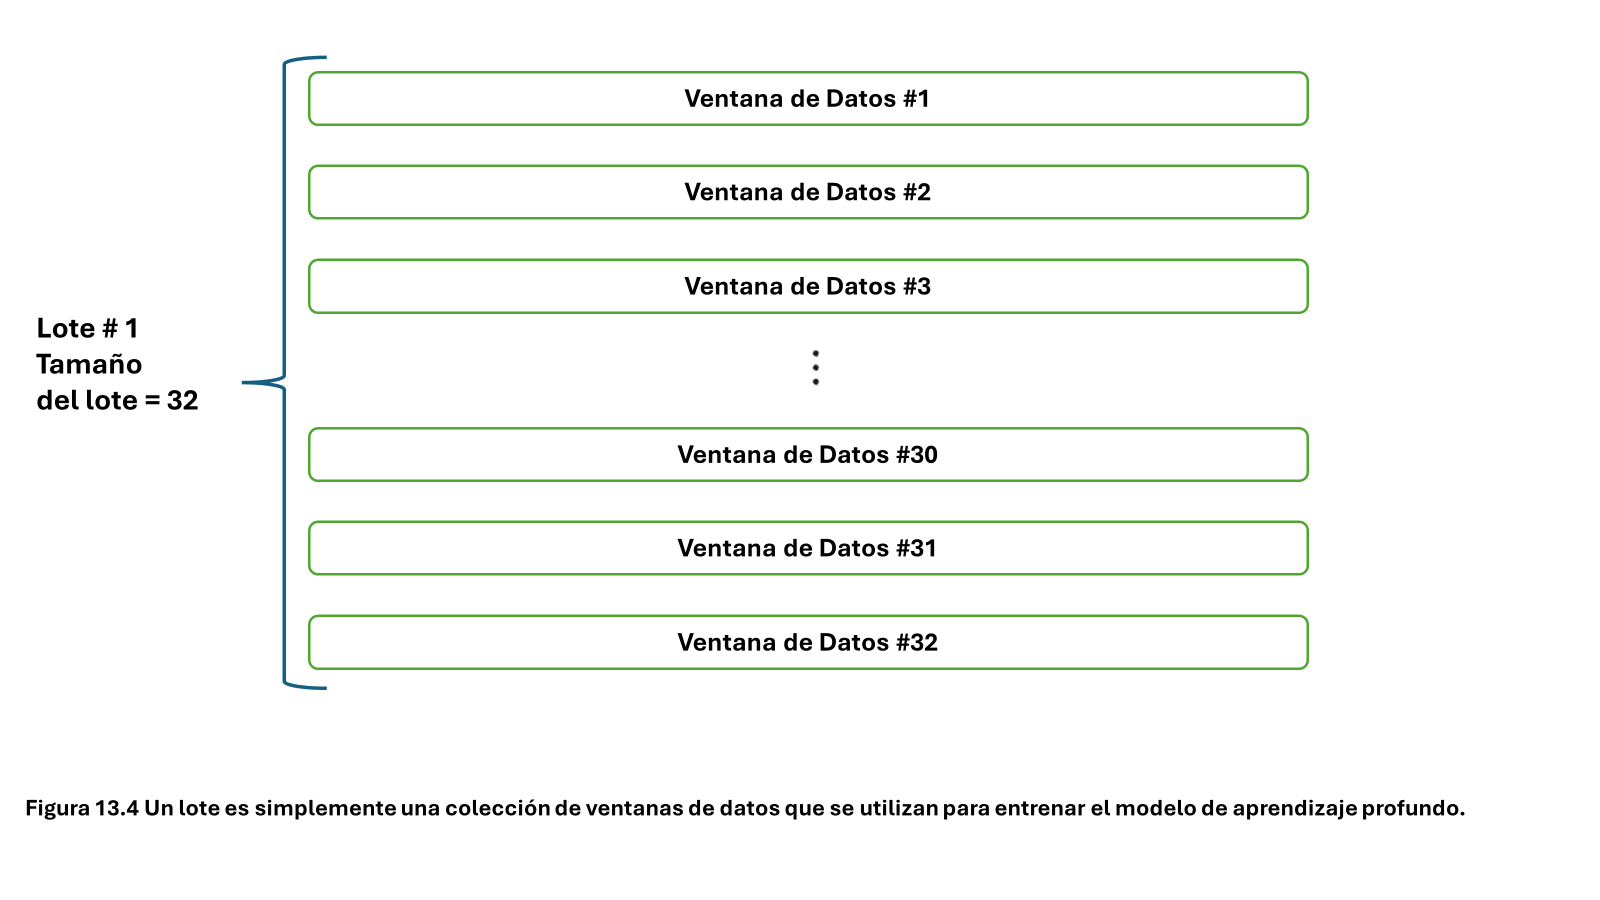


##  **El último concepto importante en la creación de ventanas de datos para el aprendizaje profundo es la mezcla**.
+ Mencioné en el primer capítulo de este libro que los datos de series temporales no se pueden mezclar.
+ Los datos de series temporales tienen un orden y ese orden debe mantenerse, entonces, ¿por qué estamos mezclando los datos aquí?
+ En este contexto, la mezcla ocurre a nivel de lote, no dentro de la ventana de datos: el orden de la serie temporal en sí se mantiene dentro de cada ventana de datos.
+ Cada ventana de datos es independiente de todas las demás.
+ Por lo tanto, en un lote, podemos mezclar las ventanas de datos y aún así mantener el orden de nuestra serie temporal, como se muestra en la figura 13.5.
+ Mezclar los datos no es esencial, pero se recomienda, ya que tiende a generar modelos más robustos.

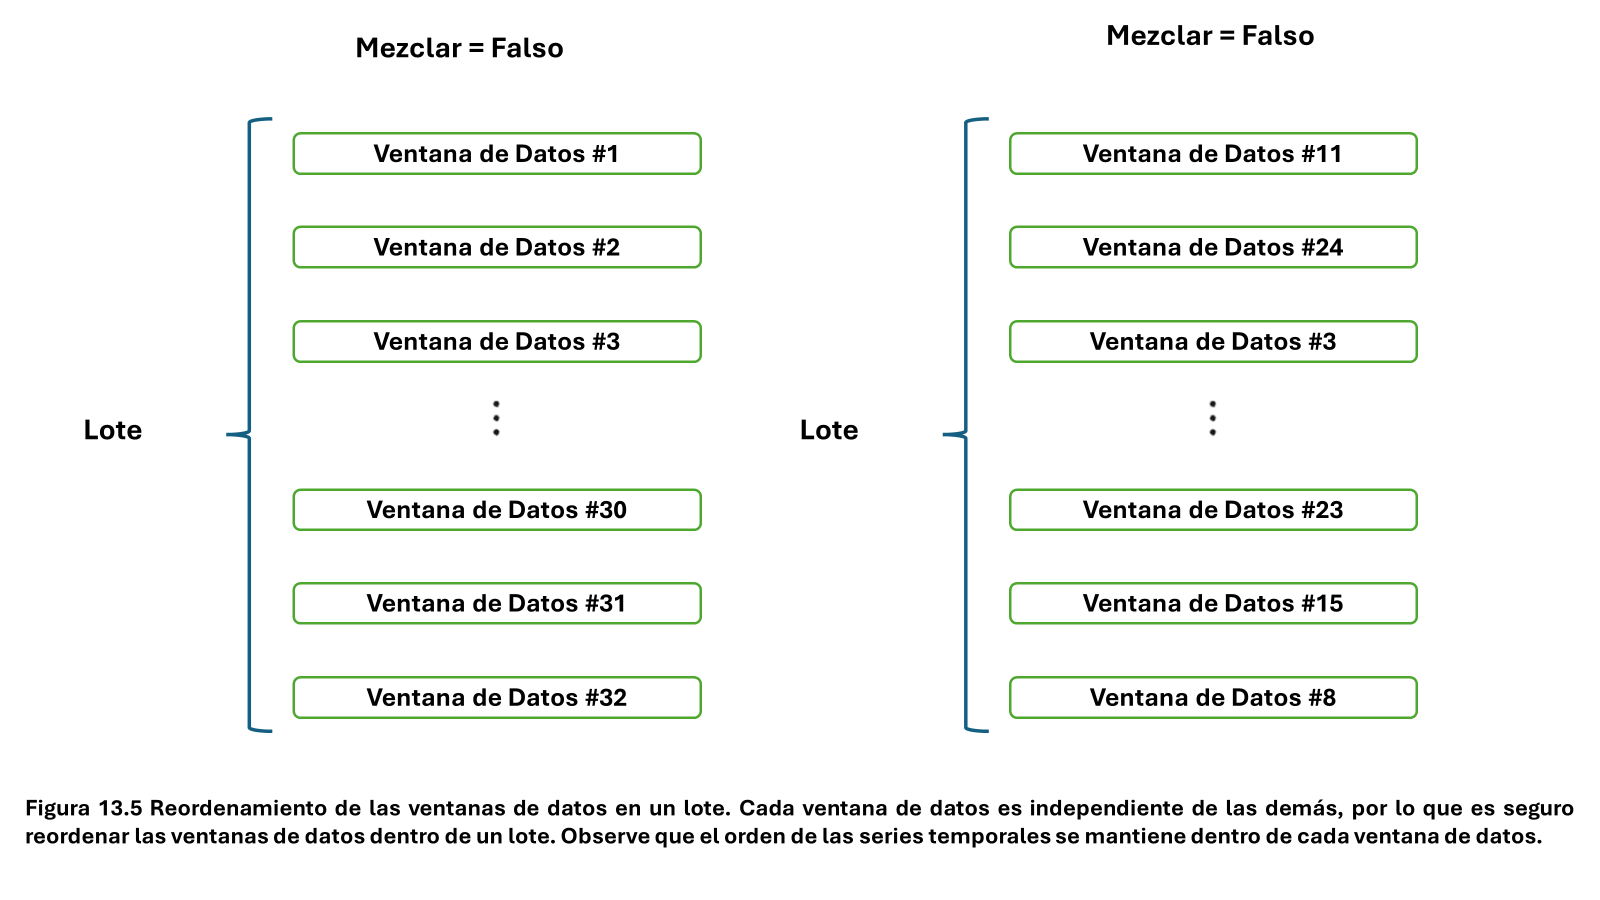

# **13.1.2. Implementación de la clase DataWindow**
+ Ahora estamos listos para implementar la clase DataWindow.
+ Esta clase tiene la ventaja de ser flexible, lo que significa que puede usarla en una amplia variedad de escenarios para aplicar el aprendizaje profundo.
+ El código completo está disponible en GitHub: https://github.com/marcopeix/
TimeSeriesForecastingInPython/tree/master/CH13%26CH14.
+ La clase se basa en el ancho de la entrada, el ancho de la etiqueta y el cambio.
+ El ancho de la entrada es simplemente la cantidad de pasos de tiempo que se ingresan en el modelo para realizar predicciones.
+** Por ejemplo, dado que tenemos datos por hora en nuestro conjunto de datos, si ingresamos al modelo 24 horas de datos para realizar una predicción, el ancho de entrada es 24.**
+ Si ingresamos solo 12 horas de datos, el ancho de entrada es 12.
+ El ancho de la etiqueta es equivalente a la cantidad de pasos de tiempo en las predicciones. Si predecimos solo un paso de tiempo, el ancho de la etiqueta es 1. Si predecimos un día completo de datos (con datos por hora), el ancho de la etiqueta es 24.
+ Finalmente, el desplazamiento es la cantidad de pasos de tiempo que separan la entrada y las predicciones.
+ Si predecimos el siguiente paso de tiempo, el desplazamiento es 1. Si predecimos las siguientes 24 horas (con datos por hora), el desplazamiento es 24.
+ Visualicemos algunas ventanas de datos para comprender mejor estos parámetros.
+ La Figura 13.6 muestra una ventana de datos donde el modelo predice el siguiente punto de datos, dado un único punto de datos.

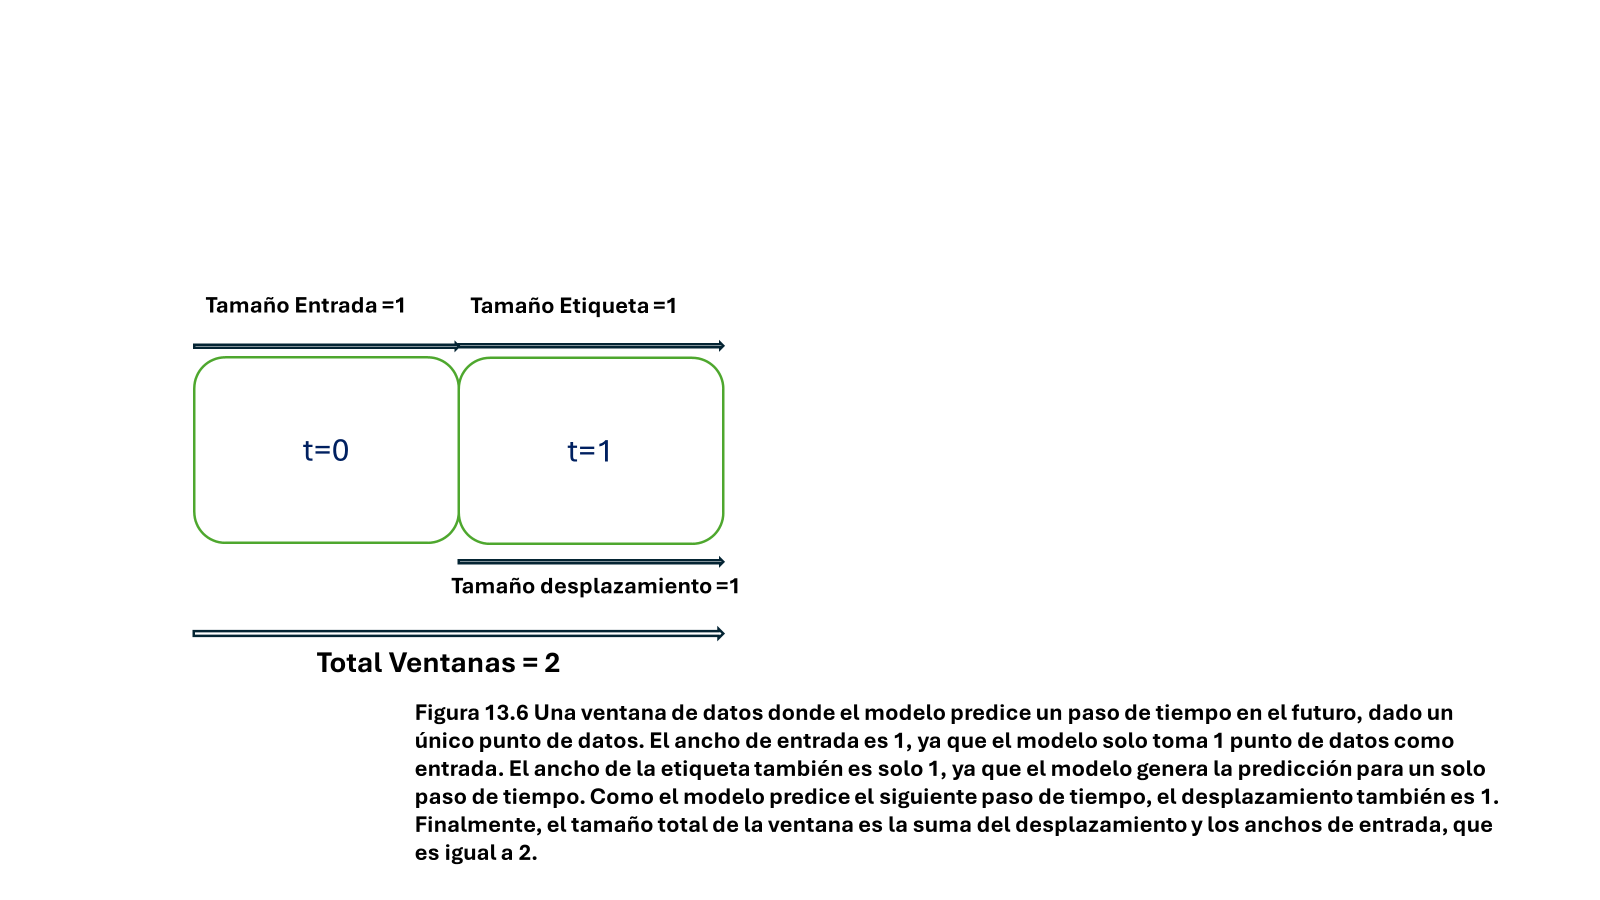

## **DataWindow y definir su función de inicialización**
+ Ahora, consideremos la situación en la que alimentamos al modelo con 24 horas de datos para predecir las próximas 24 horas.
+ La ventana de datos en esa situación se muestra en la figura 13.7.
+ Ahora que comprende el concepto de ancho de entrada, ancho de etiqueta y desplazamiento, podemos crear la clase DataWindow y definir su función de inicialización en el listado 13.1.
+ La función también tomará en cuenta los conjuntos de entrenamiento, validación y prueba, ya que las ventanas de datos provendrán de nuestro conjunto de datos.
 Por último, permitiremos que se especifique la columna de destino.

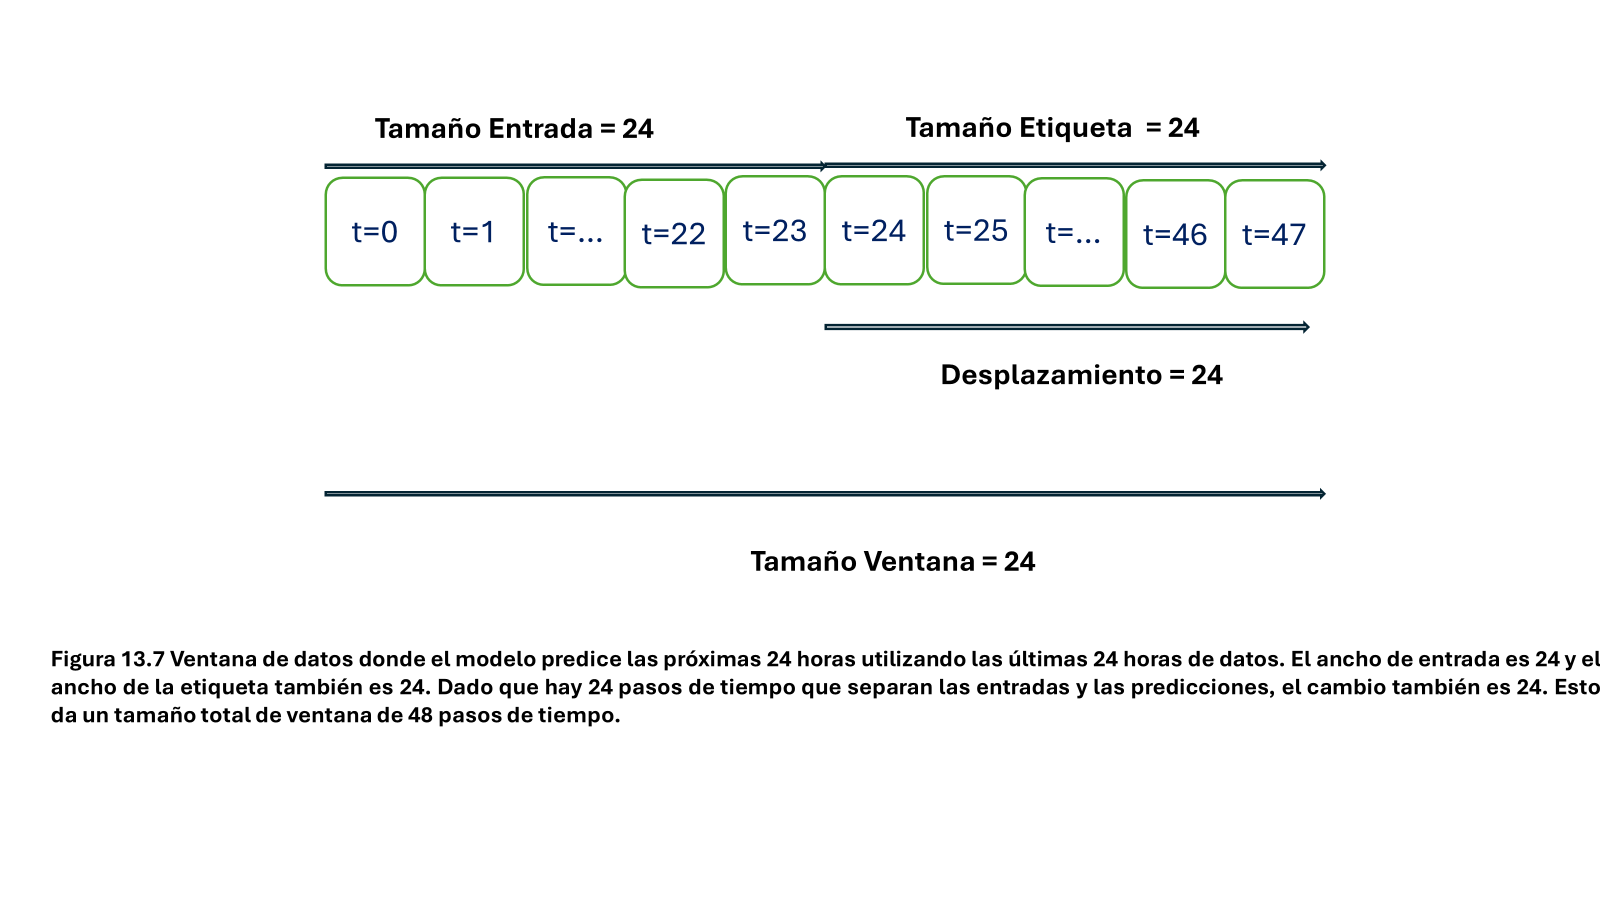

# **13.1.2. Resolviendo el problema - Continuación**.

# **Paso 1. Las librerias de necesarias**
+ El primer paso natural es importar las bibliotecas que serán necesarias para completar el proyecto.
+ Luego podemos cargar los datos y almacenarlos en un DataFrame para usarlos durante todo el proyecto.
+ Por lo tanto, importaremos las siguientes bibliotecas y especificaremos la función mágica %matplotlib inline para mostrar los gráficos en el cuaderno:

In [ ]:
#### **Paso 1. Las librerias de necesarias**
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell


In [ ]:
# Ignorar advertencias innecesarias
import warnings
warnings.filterwarnings('ignore')

# **Paso 2. Importando los datos**
+ Una vez importadas las bibliotecas, podemos leer los datos y almacenarlos en un DataFrame.
+ Como se mencionó, este conjunto de datos es una versión abreviada y depurada del conjunto de datos original disponible en el repositorio de aprendizaje automático de UCI.
+ En este caso, el conjunto de datos comienza el 29 de septiembre de 2016 a las 5 p. m. y finaliza el 30 de septiembre de 2018 a las 11 p. m.
+ Si utilizamos df.shape, podemos ver que tenemos un total de seis características y 17551 filas.
+ Las características incluyen la fecha y la hora, la temperatura, la cantidad de lluvia y nieve, la cobertura de nubes y el volumen de tráfico. La Tabla 12.1 describe cada columna con más detalle.

+ **Tabla 12.1 Variables en el conjunto de datos de volumen de tráfico interestatal metropolitano**


|Característica |Descripción|
|:--|:--:|
|date_time| Fecha y hora de los datos, registrados en la zona horaria CST. El formato es AAAA-MM-DD HH:MM:SS.
|temp |Temperatura promedio registrada en la hora, expresada en Kelvin.
|rain_1h| Cantidad de lluvia que cayó en la hora, expresada en milímetros.
|snow_1h| Cantidad de nieve que cayó en la hora, expresada en milímetros.
|clouds_all| Porcentaje de nubosidad durante la hora.
|Traffic_volume| Volumen de tráfico informado en dirección oeste por la I-94 durante la hora.

In [ ]:
## **Paso 2. Importando los datos**

df = pd.read_csv('/content/metro_interstate_traffic_volume_preprocessed.csv')
df.head(10) # Muestra las primeras cinco filas de datos.


,date_time,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,2016-09-29 17:00:00,291.75,0.0,0,0,5551.0
1,2016-09-29 18:00:00,290.36,0.0,0,0,4132.0
2,2016-09-29 19:00:00,287.86,0.0,0,0,3435.0
3,2016-09-29 20:00:00,285.91,0.0,0,0,2765.0
4,2016-09-29 21:00:00,284.31,0.0,0,0,2443.0
5,2016-09-29 22:00:00,284.37,0.0,0,0,2076.0
6,2016-09-29 23:00:00,284.53,0.0,0,0,1116.0
7,2016-09-30 00:00:00,284.26,0.0,0,0,660.0
8,2016-09-30 01:00:00,283.99,0.0,0,0,384.0
9,2016-09-30 02:00:00,283.17,0.0,0,0,281.0


In [ ]:
df.shape

(17551, 6)

In [ ]:
# Muestra el tamaño de mis datos.
print(len(df))

17551


In [ ]:
# Muestra las ultimas 10 filas de datos.
df.tail(10)

,date_time,temp,rain_1h,snow_1h,clouds_all,traffic_volume
17541,2018-09-30 14:00:00,283.48,0.00,0,90,4380.0
17542,2018-09-30 15:00:00,283.84,0.00,0,75,4302.0
17543,2018-09-30 16:00:00,284.38,0.00,0,75,4283.0
17544,2018-09-30 17:00:00,284.79,0.00,0,75,4132.0
17545,2018-09-30 18:00:00,284.20,0.25,0,75,3947.0
17546,2018-09-30 19:00:00,283.45,0.00,0,75,3543.0
17547,2018-09-30 20:00:00,282.76,0.00,0,90,2781.0
17548,2018-09-30 21:00:00,282.73,0.00,0,90,2159.0
17549,2018-09-30 22:00:00,282.09,0.00,0,90,1450.0
17550,2018-09-30 23:00:00,282.12,0.00,0,90,954.0


# **Paso 3. Dibuje nuestra variable objetivo de Pronostico**
+ Ahora, visualicemos la evolución del volumen de tráfico a lo largo del tiempo.
+ Dado que nuestro conjunto de datos es muy grande, con más de 17000 registros, representaremos gráficamente solo los primeros 400 puntos de datos, lo que equivale aproximadamente a dos semanas de datos.
+ El resultado se muestra en la figura 12.4.

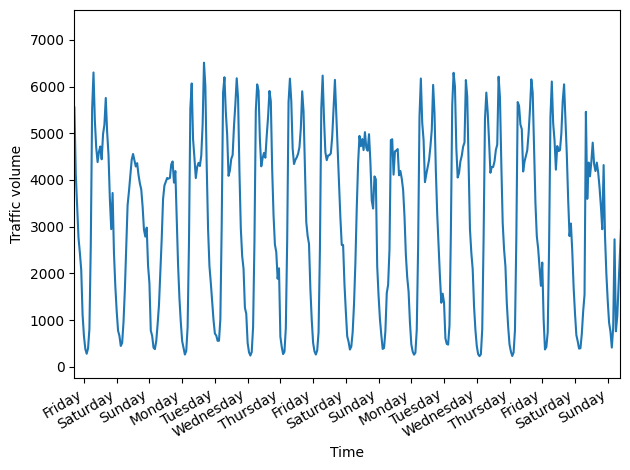

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')

plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures', dpi=300)

+ En la figura 12.4 se puede apreciar una estacionalidad diaria clara, ya que el volumen de tráfico es menor al principio y al final de cada día.
+ También se puede observar un volumen de tráfico menor durante los fines de semana.
+ En cuanto a la tendencia, es probable que dos semanas de datos no sean suficientes para sacar una conclusión razonable, pero parece que el volumen no aumenta ni disminuye con el tiempo en la figura.
+ También podemos representar gráficamente la temperatura por hora, ya que será un objetivo para nuestros modelos de múltiples salidas.
+ Aquí, esperamos ver estacionalidad anual y diaria.
+ La estacionalidad anual debería deberse a las estaciones del año, mientras que la estacionalidad diaria se deberá al hecho de que las temperaturas tienden a ser más bajas por la noche y más altas durante el día.

# **Paso 4. Si existe algun patron estacional construya un grafico donde se aprecie el patron**
+ Primero, visualicemos la temperatura horaria en todo el conjunto de datos para ver si podemos identificar alguna estacionalidad anual. El resultado se muestra en la figura 12.5.

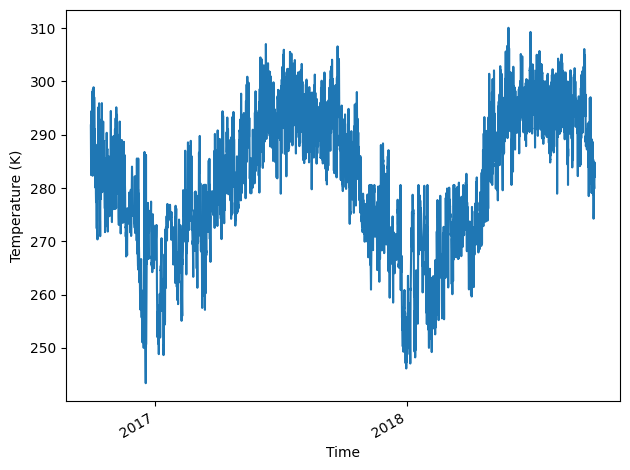

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (K)')

plt.xticks([2239, 10999], [2017, 2018])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures', dpi=300)

+ **Figura 12.5 Temperatura horaria (en Kelvin) del 29 de septiembre de 2016 al 30 de septiembre de 2018. Aunque hay ruido, podemos ver un patrón estacional anual.**


### **Acerca de la descomposición de la serie**
+ En la figura 12.5 se puede observar un patrón estacional anual en la temperatura horaria, ya que las temperaturas son más bajas a finales y principios de año (invierno en Minnesota) y más altas a mediados de año (verano).
+ Por lo tanto, como se esperaba, la temperatura tiene estacionalidad anual.
+ Ahora, verifiquemos si podemos observar estacionalidad diaria en la temperatura. El resultado se muestra en la figura 12.6.

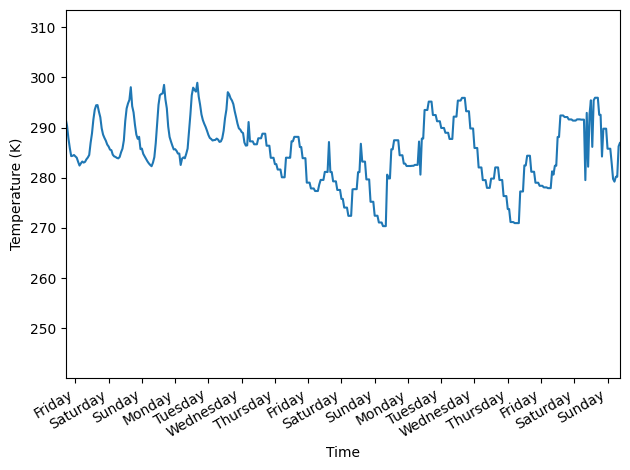

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (K)')

plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures', dpi=300)

+ **Figura 12.6 Temperatura horaria (en Kelvin) a partir del 29 de septiembre de 2016 a las 5 p.m. CST. Aunque es un poco ruidosa, podemos ver que las temperaturas son efectivamente más bajas al principio y al final de cada día y alcanzan su punto máximo durante el mediodía, lo que sugiere una estacionalidad diaria.**
+ En la figura 12.6 se puede observar que la temperatura es más baja al principio y al final de cada día y alcanza su punto máximo hacia la mitad de cada día. Esto sugiere una estacionalidad diaria, tal como observamos para el volumen de tráfico en la figura 12.4.

# **Paso 5. Ingeniería de características y división de datos**
## **12.3.2. Ingeniería de características y división de datos**
+ Una vez que hayamos terminado de explorar los datos, pasaremos a la ingeniería de características y la división de datos.
+ En esta sección, estudiaremos cada característica y crearemos otras nuevas que ayudarán a nuestros modelos a pronosticar el volumen de tráfico y la temperatura por hora.
+ Por último, dividiremos los datos y guardaremos cada conjunto como un archivo CSV para su uso posterior.
+ Una excelente manera de estudiar las características de un conjunto de datos es utilizar el método describe de pandas.
+ Este método devuelve la cantidad de registros para cada característica, lo que nos permite identificar rápidamente los valores faltantes, la media, la desviación estándar, los cuartiles y los valores máximos y mínimos de cada característica.

## **a. El método de transposición coloca cada entidad en su propia fila**

+ A partir de la salida, notará que rain_1h es mayoritariamente 0 en todo el conjunto de datos, ya que su tercer cuartil aún está en 0.
+ Dado que al menos el 75 % de los valores de rain_1h son 0, es poco probable que sea un predictor sólido del volumen de tráfico. Por lo tanto, esta característica se eliminará.
+ Si observa snow_1h, notará que esta variable está en 0 en todo el conjunto de datos. Esto es fácilmente observable, ya que sus valores mínimo y máximo son ambos 0.
+ Por lo tanto, esto no predice la variación en el volumen de tráfico a lo largo del tiempo. Esta característica también se eliminará del conjunto de datos.

In [ ]:
df.describe().transpose() # El método de transposición coloca cada entidad en su propia fila.

,count,mean,std,min,25%,50%,75%,max
temp,17551.0,281.416203,12.688262,243.39,272.22,282.41,291.89,310.07
rain_1h,17551.0,0.025523,0.259794,0.00,0.00,0.00,0.00,10.60
snow_1h,17551.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
clouds_all,17551.0,42.034129,39.065960,0.00,1.00,40.00,90.00,100.00
traffic_volume,17551.0,3321.484588,1969.223949,113.00,1298.00,3518.00,4943.00,7280.00


### **b. Eliminando las variables inocuas**

In [ ]:
### **b. Eliminando las variables inocuas**
cols_to_drop = ['rain_1h', 'snow_1h']
df = df.drop(cols_to_drop, axis=1)
df.shape

(17551, 4)

## **c. codificando la característica date_time**
+ Ahora llegamos al interesante problema de codificar el tiempo como una característica utilizable para nuestros modelos de aprendizaje profundo.
+ En este momento, la característica date_time no es utilizable por nuestros modelos, ya que es una cadena de fecha y hora.
+ Por lo tanto, la convertiremos en un valor numérico.
+ Una forma sencilla de hacerlo es expresar la fecha como una cantidad de segundos. Esto se logra mediante el uso del método timestamp de la biblioteca datetime.

In [ ]:
# **c. codificando la característica date_time**
timestamp_s = pd.to_datetime(df['date_time']).map(datetime.datetime.timestamp)

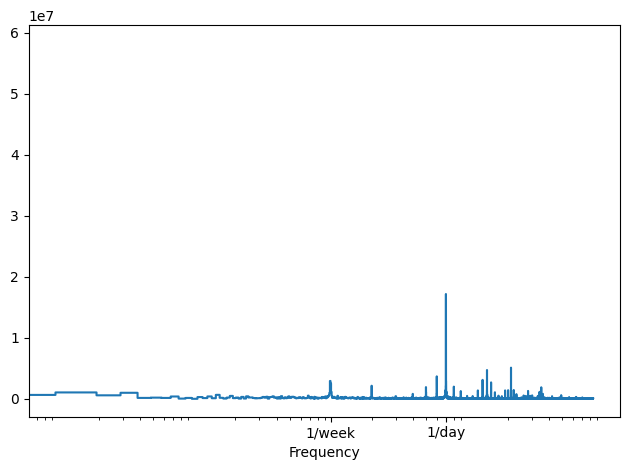

In [ ]:
fft = tf.signal.rfft(df['traffic_volume'])
f_per_dataset = np.arange(0, len(fft))

n_sample_h = len(df['traffic_volume'])
hours_per_week = 24 * 7
weeks_per_dataset = n_sample_h / hours_per_week

f_per_week = f_per_dataset / weeks_per_dataset

plt.step(f_per_week, np.abs(fft))
plt.xscale('log')
plt.xticks([1, 7], ['1/week', '1/day'])
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

#### **d. Acerca del paso anterior**
+ Lamentablemente, no hemos terminado, ya que esto simplemente expresa cada fecha en segundos, como se muestra en la figura 12.7.
+ Esto nos lleva a perder la naturaleza cíclica del tiempo, porque la cantidad de segundos simplemente aumenta linealmente con el tiempo.
+ Por lo tanto, debemos aplicar una transformación para recuperar el comportamiento cíclico del tiempo.

#### **e. Recuperando la propiedad ciclica**
+ Una forma sencilla de hacerlo es aplicar una transformación seno.
+ Sabemos que la función seno es cíclica, acotada entre -1 y 1. Esto nos ayudará a recuperar parte de la propiedad cíclica del tiempo.
+ **La marca de tiempo está en segundos, por lo que debemos calcular la cantidad de segundos de un día antes de aplicar la transformación del seno.**
+ **Aplicación de la transformación seno. Observe que utilizamos radianes en la función seno.**

In [ ]:
# **e. Recuperando la propiedad ciclica**
day = 24 * 60 * 60

df['day_sin'] = (np.sin(timestamp_s * (2*np.pi/day))).values
df['day_cos'] = (np.cos(timestamp_s * (2*np.pi/day))).values

In [ ]:
df = df.drop(['date_time'], axis=1) # Eliminar la columna date_time

df.head()

,temp,clouds_all,traffic_volume,day_sin,day_cos
0,291.75,0,5551.0,-0.965926,-2.588190e-01
1,290.36,0,4132.0,-1.000000,-4.048636e-12
2,287.86,0,3435.0,-0.965926,2.588190e-01
3,285.91,0,2765.0,-0.866025,5.000000e-01
4,284.31,0,2443.0,-0.707107,7.071068e-01


### **f. Transformacion seno - coseno**
+ Con una única transformación de seno, recuperamos parte de la propiedad cíclica que se perdió al convertir a segundos.
+ Sin embargo, en este punto, las 12 p. m. equivalen a las 12 a. m. y las 5 p. m. equivalen a las 5 a. m.
+ Esto no es deseable, ya que queremos distinguir entre la mañana y la tarde.
+ Por lo tanto, aplicaremos una transformación de coseno. Sabemos que el coseno está desfasado con la función seno.
+ Esto nos permite distinguir entre las 5 a. m. y las 5 p. m., expresando la naturaleza cíclica del tiempo en un día. En este punto, podemos eliminar la columna date_time del DataFrame.

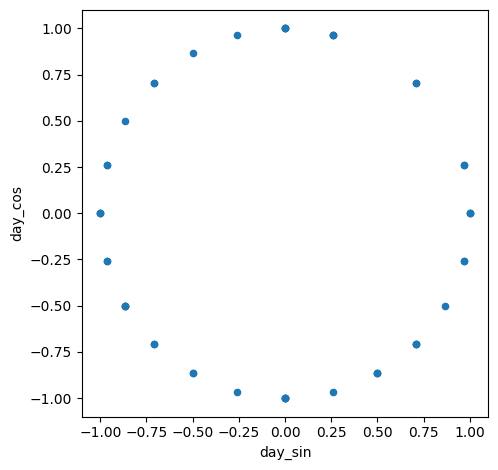

In [ ]:
# **f. Transformacion seno - coseno**
df.sample(50).plot.scatter('day_sin','day_cos').set_aspect('equal');
plt.tight_layout()

plt.savefig('figures', dpi=300)

## **Acerca de la Transformacion seno - coseno**
+ En la figura 12.8, notará que los puntos forman un círculo, como un reloj.
+ Por lo tanto, hemos expresado con éxito cada marca de tiempo como un punto en el reloj, lo que significa que ahora tenemos valores numéricos que conservan la naturaleza cíclica del tiempo en un día, y esto se puede usar en nuestros modelos de aprendizaje profundo.
+ Esto será útil ya que observamos la estacionalidad diaria tanto de la temperatura como del volumen de tráfico.

### **Paso 7. Conjunto de entrenamiento, validación y prueba**

+ *Una vez completada la ingeniería de características, ahora podemos dividir nuestros conjuntos de datos de entrenamiento, validación y prueba*.
+ El conjunto de entrenamiento es la muestra de datos que se usa para ajustar el modelo.
+ El conjunto de validación es un poco como un conjunto de prueba que el modelo puede revisar para ajustar sus hiperparámetros y mejorar su rendimiento durante el entrenamiento del modelo.
+ El conjunto de prueba está completamente separado del procedimiento de entrenamiento del modelo y se usa para una evaluación imparcial del rendimiento del modelo.
+ **Aquí usaremos una división simple de 70:20:10 para los conjuntos de entrenamiento, validación y prueba. Si bien el 10% de los datos parece una porción pequeña para el conjunto de prueba, recuerde que tenemos más de 17000 registros, lo que significa que evaluaremos el modelo en más de 1000 puntos de datos, lo cual es más que suficiente.**

In [ ]:
n = len(df)

# Split 70:20:10 (train:validation:test)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

train_df.shape, val_df.shape, test_df.shape

print(f'Longitud del conjunto de Datos es = {len(df)}')
print(f'Longitud del conjunto de Entrenamiento es = {len(train_df)}')
print(f'Longitud del conjunto de Validación es = {len(val_df)}')
print(f'Longitud del conjunto de prueba es = {len(test_df)}')



Longitud del conjunto de Datos es = 17551
Longitud del conjunto de Entrenamiento es = 12285
Longitud del conjunto de Validación es = 3510
Longitud del conjunto de prueba es = 1756


In [ ]:
df.head() # recordemos cuales son nuestras variables

,temp,clouds_all,traffic_volume,day_sin,day_cos
0,291.75,0,5551.0,-0.965926,-2.588190e-01
1,290.36,0,4132.0,-1.000000,-4.048636e-12
2,287.86,0,3435.0,-0.965926,2.588190e-01
3,285.91,0,2765.0,-0.866025,5.000000e-01
4,284.31,0,2443.0,-0.707107,7.071068e-01


In [ ]:
df.tail() # recordemos cuales son nuestras variables

,temp,clouds_all,traffic_volume,day_sin,day_cos
17546,283.45,75,3543.0,-0.965926,0.258819
17547,282.76,90,2781.0,-0.866025,0.500000
17548,282.73,90,2159.0,-0.707107,0.707107
17549,282.09,90,1450.0,-0.500000,0.866025
17550,282.12,90,954.0,-0.258819,0.965926


### **Paso 8. debemos escalarlos para que todos los valores estén entre 0 y 1**
+ Antes de guardar los datos, debemos escalarlos para que todos los valores estén entre 0 y 1.
+ Esto reduce el tiempo necesario para entrenar los modelos de aprendizaje profundo y mejora su rendimiento.
+ Usaremos `MinMaxScaler` de `sklearn` para escalar nuestros datos.
+ Tenga en cuenta que ajustaremos el escalador al conjunto de entrenamiento para evitar fugas de datos.
+ De esa manera, simulamos el hecho de que solo tenemos los datos de entrenamiento disponibles cuando usamos el modelo y el modelo no conoce información futura. La evaluación del modelo permanece imparcial.

In [ ]:
## **8. Escalando los datos**
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])

### **Paso 9. Parámetros escalados del modelo**
+ Vale la pena mencionar por qué los datos se escalan y no se normalizan.
+ Escalado y normalización pueden ser términos confusos para los científicos de datos, ya que a menudo se usan indistintamente.
+ En resumen, **escalar los datos afecta solo su escala y no su distribución**.
+ Por lo tanto, simplemente fuerza los valores dentro de un rango determinado.
+ En nuestro caso, forzamos los valores a estar entre 0 y 1.
+ **Normalizar los datos, por otro lado, afecta su distribución y su escala**.
+ Por lo tanto, normalizar los datos los obligaría a tener una distribución normal o una distribución gaussiana.
+ El rango original también cambiaría y trazar la frecuencia de cada valor generaría una curva de campana clásica.
+ Normalizar los datos solo es útil cuando los modelos que usamos requieren que los datos sean normales.
+ Por ejemplo, el análisis discriminante lineal (LDA) se deriva del supuesto de una distribución normal, por lo que es mejor normalizar los datos antes de usar LDA.
+ Sin embargo, en el caso del aprendizaje profundo, no se hacen suposiciones, por lo que la normalización no es necesaria.


In [ ]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,12285.0,0.555681,0.196527,0.0,0.424800,0.557913,0.715072,1.0
clouds_all,12285.0,0.431034,0.393716,0.0,0.010000,0.400000,0.900000,1.0
traffic_volume,12285.0,0.445735,0.273635,0.0,0.165899,0.473141,0.671271,1.0
day_sin,12285.0,0.500084,0.353568,0.0,0.146447,0.500000,0.853553,1.0
day_cos,12285.0,0.500084,0.353568,0.0,0.146447,0.500000,0.853553,1.0


### **Paso 10. Guardar los Datos como Archivo SCV**
+ Finalmente, guardaremos cada conjunto como un archivo CSV para usarlo en los siguientes capítulos.

In [ ]:
train_df.to_csv('train.csv')
val_df.to_csv('val.csv')
test_df.to_csv('test.csv')

### **Paso 11. Explorando cómo se entrenan los modelos de aprendizaje profundo para la previsión de series temporales**

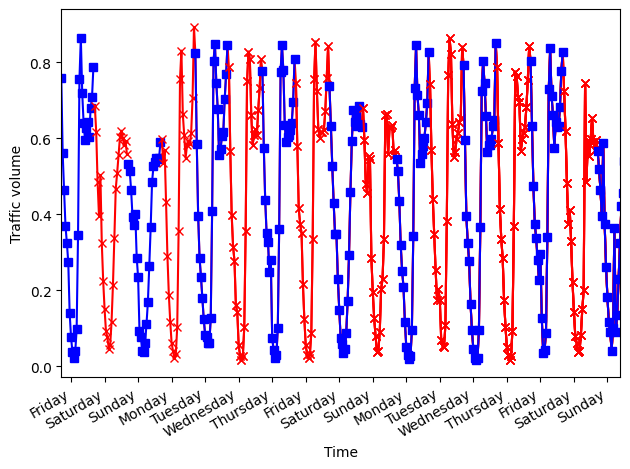

In [ ]:
fig, ax = plt.subplots()

for n in range(0,17,2):
    start = 24*n
    stop = 24*(n+1)
    ax.plot(train_df.traffic_volume[start:stop], marker='s', color='blue', label='input')
    ax.plot(train_df.traffic_volume[stop:2*stop], marker='x', color='red', label='label')
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')

plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

### **Paso 12. Implementando la clase DataWindow**

+ A continuación, definiremos una función para representar gráficamente los datos de entrada, las predicciones y los valores reales (listado 13.2).
+ Dado que trabajaremos con muchas ventanas de tiempo, mostraremos solo el gráfico de tres ventanas de tiempo, pero este parámetro se puede cambiar fácilmente.
+ Además, la etiqueta predeterminada será el volumen de tráfico, pero podemos cambiarla especificando cualquier columna que elijamos.
+ Nuevamente, esta función debe incluirse en la clase DataWindow.

In [ ]:
class DataWindow():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
        inputs, labels = self.sample_batch

        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))

        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)
# Grafique las entradas. Aparecerán como una línea azul continua con puntos.

            if self.label_columns:
              label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
              label_col_index = plot_col_index

            if label_col_index is None:
              continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', c='green', s=64)
            # Grafique las etiquetas o los valores reales. Aparecerán como cuadrados verdes.
            if model is not None:
              predictions = model(inputs)
              plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='red', s=64)
# Grafica las predicciones. Aparecerán como cruces rojas.
            if n == 0:
              plt.legend()

        plt.xlabel('Time (h)')
# Pase los datos. Esto corresponde a nuestro conjunto de entrenamiento, conjunto de validación o conjunto de prueba.
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )
  # Los objetivos se establecen en Ninguno, ya que son manejados por la función split_to_input_labels.
        ds = ds.map(self.split_to_inputs_labels)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def sample_batch(self):
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

### **Clase DataWindow creada**

+ Por ahora, la clase DataWindow puede parecer un poco abstracta, pero pronto la usaremos para aplicar modelos de referencia.
+ Usaremos esta clase en todos los capítulos de esta parte del libro dedicada al aprendizaje profundo, por lo que poco a poco dominarás este código y apreciarás lo fácil que es probar diferentes arquitecturas de aprendizaje profundo.

# **13.2. Aplicación de modelos de línea base**

+ Una vez completada la clase DataWindow, estamos listos para usarla.
+ Aplicaremos modelos de línea base como modelos de un solo paso, de varios pasos y de varias salidas.
+ Verá que su implementación es similar e increíblemente simple cuando tenemos las ventanas de datos adecuadas.
+ Recuerde que una línea base se utiliza como punto de referencia para evaluar modelos más complejos.
+ Un modelo tiene un buen rendimiento si se compara favorablemente con otro, por lo que la creación de una línea base es un paso importante en el modelado.

## **13.2.1. Modelo de línea base de un solo paso**
+ Primero implementaremos un modelo de un solo paso como línea base.
+ En un modelo de un solo paso, la entrada es un paso de tiempo y la salida es la predicción del siguiente paso de tiempo.
+ El primer paso es generar una ventana de datos. Dado que estamos definiendo un modelo de un solo paso, el ancho de entrada es 1, el ancho de la etiqueta es 1 y el desplazamiento también es 1, ya que el modelo predice el siguiente paso de tiempo. Nuestra variable objetivo es el volumen de tráfico.

### **Paso 13. Modelo de línea base de un solo paso**
+ Para fines de representación gráfica, también definiremos una ventana más amplia para poder visualizar muchas predicciones de nuestro modelo.
+ De lo contrario, solo podríamos visualizar un punto de datos de entrada y una predicción de salida, lo que no es muy interesante.

In [ ]:
# **Paso 13. Modelo de línea base de un solo paso**
single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['traffic_volume'])
wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['traffic_volume'])

+ En esta situación, la predicción más simple que podemos hacer es el último valor observado.
+ Básicamente, la predicción es simplemente el punto de datos de entrada.
+ Esto se implementa mediante la clase Baseline.
+ Como puede ver en la siguiente lista, la clase Baseline también se puede utilizar para un modelo de múltiples salidas.
+ Por ahora, nos centraremos únicamente en un modelo de un solo paso.

In [ ]:
class Baseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs

        elif isinstance(self.label_index, list):
            tensors = []
            for index in self.label_index:
                result = inputs[:, :, index]
                result = result[:, :, tf.newaxis]
                tensors.append(result)
            return tf.concat(tensors, axis=-1)

        result = inputs[:, :, self.label_index]
        return result[:,:,tf.newaxis]

### **Paso 14. Una vez definida la clase, podemos inicializar el modelo y compilarlo para generar predicciones**.
+ Para ello, buscaremos el índice de nuestra columna de destino, Traffic_volume, y lo pasaremos a Baseline.
+ Tenga en cuenta que **TensorFlow** requiere que proporcionemos una función de pérdida y una métrica de evaluación.
+ En este caso, y a lo largo de los capítulos de aprendizaje profundo, **utilizaremos el error cuadrático medio (MSE) como función de pérdida**: penaliza los errores grandes y, por lo general, produce modelos bien ajustados.
+ **Para la métrica de evaluación, utilizaremos el error absoluto medio (MAE) por su facilidad de interpretación.**

In [ ]:
## **a. Definimos la función de perdida y la métrica**
# Genere un diccionario con el nombre y el índice de cada columna en el conjunto de entrenamiento.
column_indices = {name: i for i, name in enumerate(train_df.columns)}

# Pase el índice de la columna de destino en la clase Baseline.
baseline_last = Baseline(label_index=column_indices['traffic_volume'])

# Compilar el modelo para generar las predicciones.
baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

### **Paso 15. Ahora evaluaremos el rendimiento de nuestra línea base tanto en el conjunto de validación como en el de prueba.**
+ Los modelos creados con TensorFlow cuentan con el método de evaluación, que nos permite comparar las predicciones con los valores reales y calcular la métrica de error.

In [ ]:
# Cree un diccionario para almacenar el MAE de un modelo en el conjunto de validación.
val_performance = {}

# Cree un diccionario para almacenar el MAE de un modelo en el conjunto de prueba.
performance = {}

#Almacene el MAE de baseline en el conjunto de validación.
val_performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.val)
# Almacene el MAE de la línea base en el conjunto de prueba.
performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.test, verbose=0)

110/110 [==============================] - 1s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0831


### **Paso 16. Podemos visualizar las predicciones utilizando el método plot de la clase DataWindow.**
+ Genial, hemos creado con éxito una línea base que predice el último valor conocido y lo hemos evaluado. Podemos visualizar las predicciones utilizando el método plot de la clase DataWindow.
+ Recuerda utilizar wide_window para ver más de dos puntos de datos.

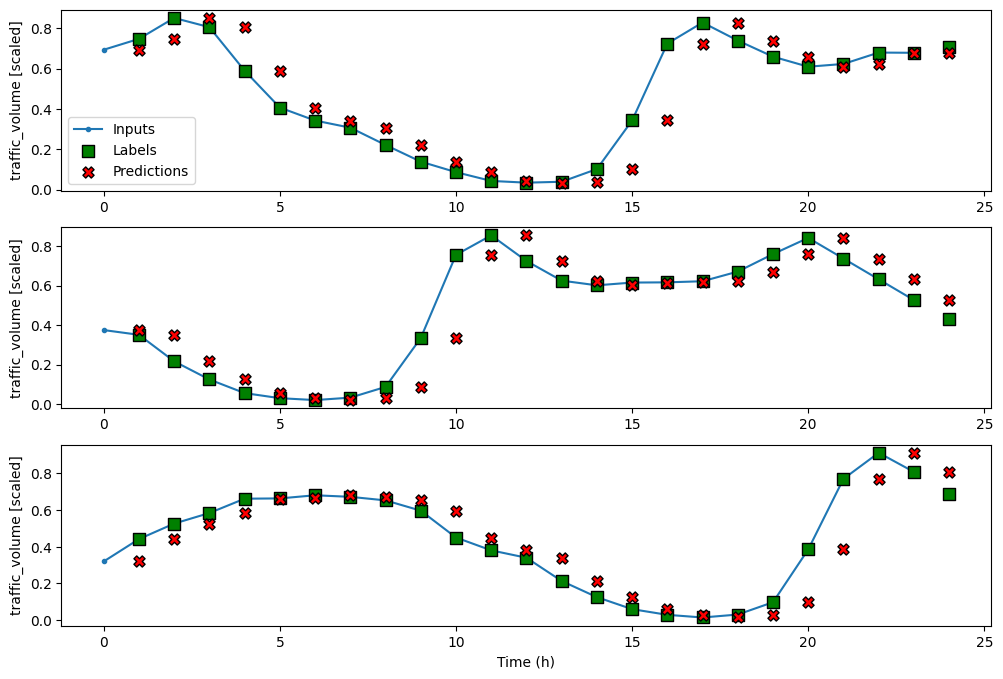

In [ ]:
wide_window.plot(baseline_last)

plt.savefig('figures', dpi=300)

### **Acerca del paso 16**
+ **Figura 13.9 Predicciones de nuestro modelo de referencia de un solo paso en tres secuencias del lote de muestra. La predicción en cada paso de tiempo es el último valor conocido, lo que significa que nuestra referencia funciona como se esperaba.**
+ En la figura 13.9, las etiquetas son cuadrados y las predicciones son cruces.
+ Las cruces en cada paso de tiempo son simplemente el último valor conocido, lo que significa que tenemos una línea base que funciona como se esperaba.
+ Su gráfico puede diferir del de la figura 13.9, ya que el lote de muestra almacenado en caché cambia cada vez que se inicializa una ventana de datos.

### **Paso 17. Opcionalmente podemos imprimir el MAE de nuestra línea base en el conjunto de prueba.**
+ Esto devuelve un MAE de 0,081.
+ Los modelos más complejos deberían tener un mejor rendimiento que el modelo de referencia, lo que daría como resultado un MAE menor.

In [ ]:
# Almacene el MAE de la línea base en el conjunto de prueba.
print(f'Para nuestro modelo de Referencia MAE el error absoluto es')
print(performance['Baseline - Last'][1])

Para nuestro modelo de Referencia MAE el error absoluto es
0.08128400146961212


# **13.2.2. Modelos de referencia de varios pasos**
+ **En la sección anterior, construimos un modelo de referencia de un solo paso que simplemente predijo el último valor conocido.**
+ Para los modelos de varios pasos, predeciremos más de un paso de tiempo en el futuro.
+ En este caso, pronosticaremos el volumen de tráfico para las próximas 24 horas de datos dada una entrada de 24 horas.
+ Nuevamente, el primer paso es generar la ventana de datos adecuada.
+ **Debido a que deseamos predecir 24 pasos de tiempo en el futuro con una entrada de 24 horas, el ancho de entrada es 24, el ancho de la etiqueta es 24 y el cambio también es 24.**

### **Paso 18. Pronosticando con el Modelo de referencia de varios pasos**
+ Con la ventana de datos generada, ahora podemos centrarnos en implementar los modelos de línea base.
+ En esta situación, hay dos líneas base razonables:
  + Predecir el último valor conocido para los próximos 24 pasos de tiempo.
  + Predecir los últimos 24 pasos de tiempo para los próximos 24 pasos de tiempo.
+ Con eso en mente, implementemos la primera línea base, donde simplemente repetiremos el último valor conocido en los próximos 24 pasos de tiempo.


In [ ]:
# **Paso 18. Pronosticando con el Modelo de referencia de varios pasos**
multi_window = DataWindow(input_width=24, label_width=24, shift=24, label_columns=['traffic_volume'])

### **a. PREDICCIÓN DEL ÚLTIMO VALOR CONOCIDO**
+ Para predecir el último valor conocido, definiremos una clase MultiStepLastBaseline que simplemente toma la entrada y repite el último valor de la secuencia de entrada en 24 pasos de tiempo.

In [ ]:
class MultiStepLastBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None: #Devuelve el último valor conocido de la columna de destino durante los próximos 24 pasos de tiempo.
            return tf.tile(inputs[:, -1:, :], [1, 24, 1]) # Si no se especifica ningún objetivo, devuelve el último valor conocido
            #de todas las columnas durante los próximos 24 pasos de tiempo
        return tf.tile(inputs[:, -1:, self.label_index:], [1, 24, 1])


### **b. A continuación, inicializaremos la clase y especificaremos la columna de destino.**
+ Luego, repetiremos los mismos pasos que en la sección anterior, compilando el modelo y evaluándolo en el conjunto de validación y el conjunto de prueba.

In [ ]:
ms_baseline_last = MultiStepLastBaseline(label_index=column_indices['traffic_volume'])

ms_baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

ms_val_performance = {}
ms_performance = {}

ms_val_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.val)
ms_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.test, verbose=0)

109/109 [==============================] - 1s 6ms/step - loss: 0.1874 - mean_absolute_error: 0.3520


### **c. Ahora podemos visualizar las predicciones utilizando el método de gráfico de DataWindow**
+ El resultado se muestra en la figura 13.10.

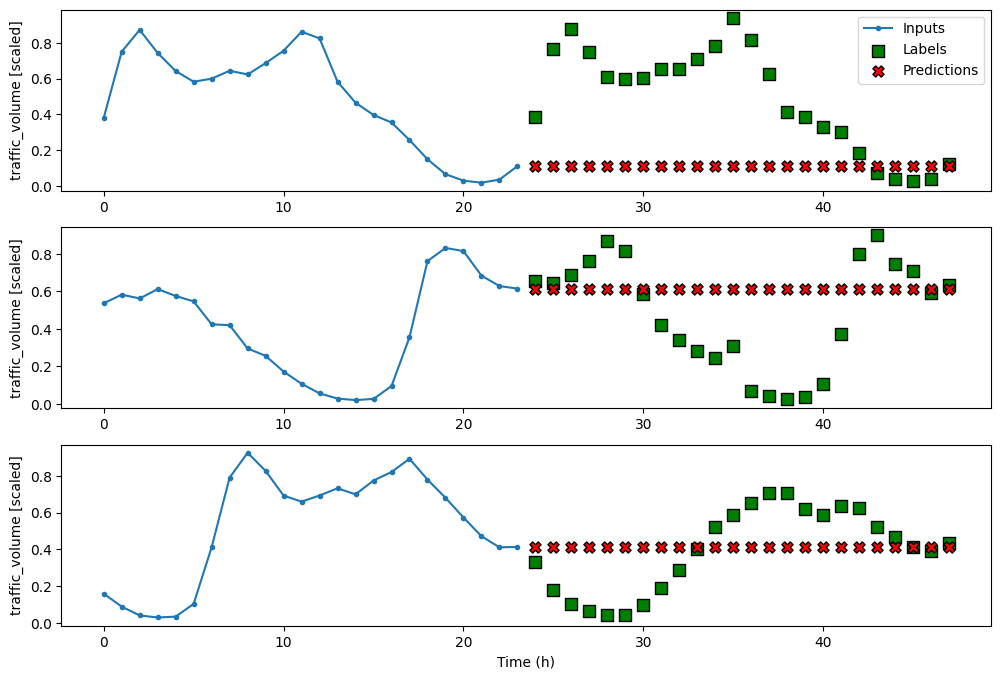

In [ ]:
multi_window.plot(ms_baseline_last)

+ **Figura 13.10 Predicción del último valor conocido para los próximos 24 pasos de tiempo. Podemos ver que las predicciones, que se muestran como cruces, corresponden al último valor de la secuencia de entrada, por lo que nuestra línea base se comporta como se esperaba.**
+ Nuevamente, podemos imprimir opcionalmente el MAE de la línea base. De la figura 13.10, podemos esperar que

In [ ]:
# Almacene el MAE de la línea base en el conjunto de prueba.
print(f'Para nuestro modelo de Referencia MAE multipaso el error absoluto es')
print(ms_performance['Baseline - Last'][1])

Para nuestro modelo de Referencia MAE multipaso el error absoluto es
0.34706419706344604


+ **Esto da un MAE de 0,347. Ahora veamos si podemos construir una mejor línea base simplemente repitiendo la secuencia de entrada.**

### **Paso 19. REPETICIÓN DE LA SECUENCIA DE ENTRADA**
+ Implementemos una segunda línea base para los modelos de varios pasos, que simplemente devuelve la secuencia de entrada.
+ Esto significa que la predicción para las próximas 24 horas será simplemente la última de las 24 horas de datos conocidas.
### **a. Esto se implementa a través de la clase RepeatBaseline**

In [ ]:
class RepeatBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        return inputs[:, :, self.label_index:]

### **b. Ahora podemos inicializar el modelo de referencia y generar predicciones.**
+ Tenga en cuenta que la función de pérdida y la métrica de evaluación siguen siendo las mismas.

In [ ]:
ms_baseline_repeat = RepeatBaseline(label_index=column_indices['traffic_volume'])

ms_baseline_repeat.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

ms_val_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.val)
ms_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.test, verbose=0)

109/109 [==============================] - 0s 3ms/step - loss: 0.2125 - mean_absolute_error: 0.3533


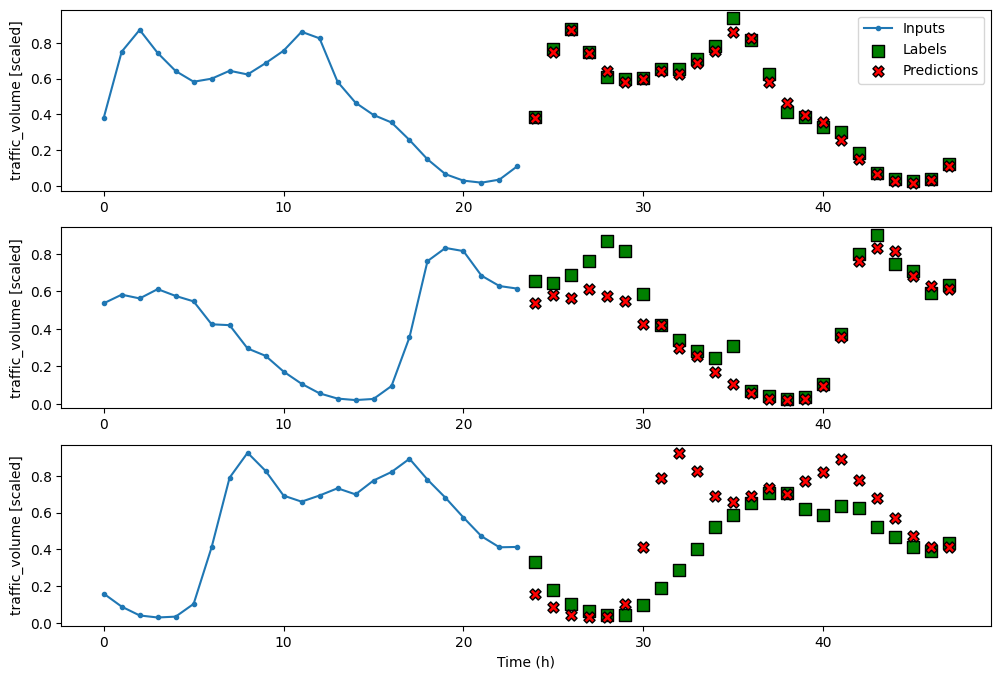

In [ ]:
multi_window.plot(ms_baseline_repeat)

plt.savefig('figures', dpi=300)

+ **A continuación, podemos visualizar las predicciones. El resultado se muestra en la figura 13.11. Esta línea base funciona bien, lo cual es de esperar, ya que identificamos la estacionalidad diaria en el capítulo anterior. Esta línea base es el equivalente a predecir la última estación conocida.**

In [ ]:
# Almacene el MAE de la línea base en el conjunto de prueba.
print(f'Para nuestro modelo de Referencia MAE multipaso el error absoluto es')
print(ms_performance['Baseline - Last'][1])

Para nuestro modelo de Referencia MAE multipaso el error absoluto es
0.34706419706344604


# **13.2.3. Modelo de referencia de múltiples salidas**
+ El último tipo de modelo que abordaremos es el modelo de múltiples salidas.
+ En esta situación, deseamos predecir el volumen de tráfico y la temperatura para el siguiente intervalo de tiempo utilizando un único punto de datos de entrada.
+ Básicamente, estamos aplicando el modelo de un solo paso tanto al volumen de tráfico como a la temperatura, lo que lo convierte en un modelo de múltiples salidas.
+ Nuevamente, comenzaremos definiendo la ventana de datos, pero aquí definiremos dos ventanas:
  + una para el entrenamiento y la otra para la visualización.
+ Dado que el modelo toma un punto de datos y genera una predicción, queremos inicializar una amplia ventana de datos para visualizar muchas predicciones en muchos intervalos de tiempo.

### **Paso 20. Modelo de referencia de múltiples salidas**
+ Luego, utilizaremos la clase Baseline que definimos para el modelo de un solo paso.
+ Recuerde que esta clase puede generar el último valor conocido para una lista de objetivos.

In [ ]:
# Tenga en cuenta que pasamos tanto temp como Traffic_volume, ya que esos son nuestros dos objetivos para el modelo de salida múltiple.
mo_single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['temp','traffic_volume'])
mo_wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['temp','traffic_volume'])

In [ ]:
print(column_indices['traffic_volume'])
print(column_indices['temp'])

2
0


In [ ]:
mo_baseline_last = Baseline(label_index=[0, 2])

mo_baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

mo_val_performance = {}
mo_performance = {}

mo_val_performance['Baseline - Last'] = mo_baseline_last.evaluate(mo_wide_window.val)
mo_performance['Baseline - Last'] = mo_baseline_last.evaluate(mo_wide_window.test, verbose=0)

109/109 [==============================] - 0s 3ms/step - loss: 0.0069 - mean_absolute_error: 0.0482


### **Paso 21. Predicciones para nuestras variables objetivo**
+ Por último, podemos visualizar las predicciones en relación con los valores reales.
+ De forma predeterminada, nuestro método de gráfico mostrará el volumen de tráfico en el eje y, lo que nos permitirá visualizar rápidamente uno de nuestros objetivos, como se muestra en la figura 13.12.**

### **a. Predicción para la variable traffic_volume**

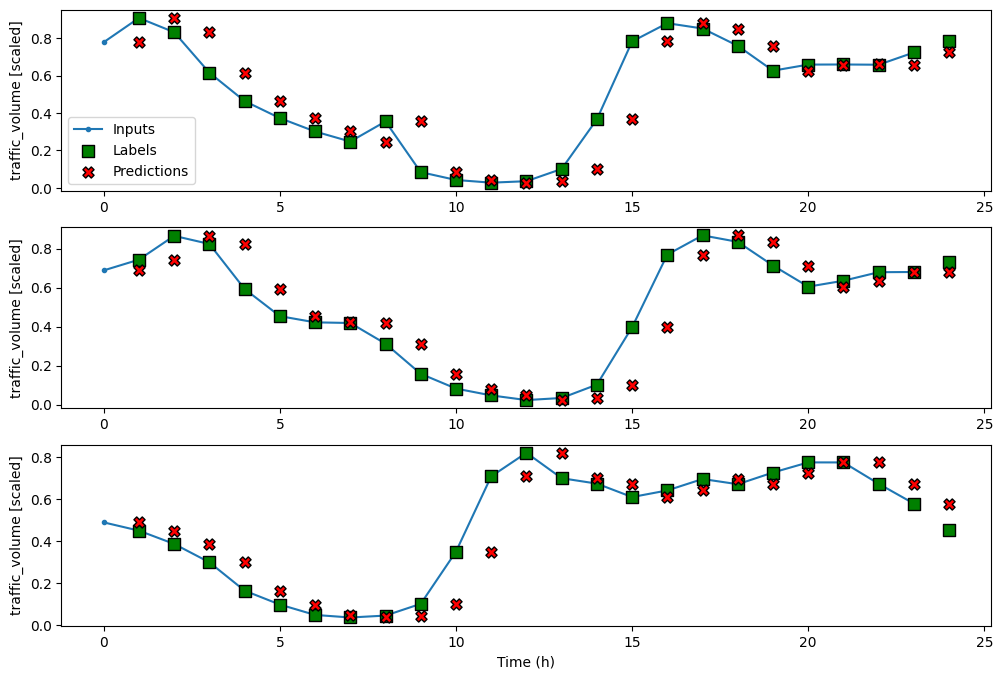

In [ ]:
### **a. Predicción para la variable traffic_volume**
mo_wide_window.plot(mo_baseline_last)

plt.savefig('figures', dpi=300)

### **b. Predicción para la variable Temp**
+ La figura 13.12 no muestra nada sorprendente, ya que ya vimos estos resultados cuando construimos un modelo de referencia de un solo paso.
+ La particularidad del modelo de múltiples salidas es que también tenemos predicciones para la temperatura.
+ Por supuesto, también podemos visualizar las predicciones para la temperatura especificando el objetivo en el método de gráfico.
+ El resultado se muestra en la figura 13.13.

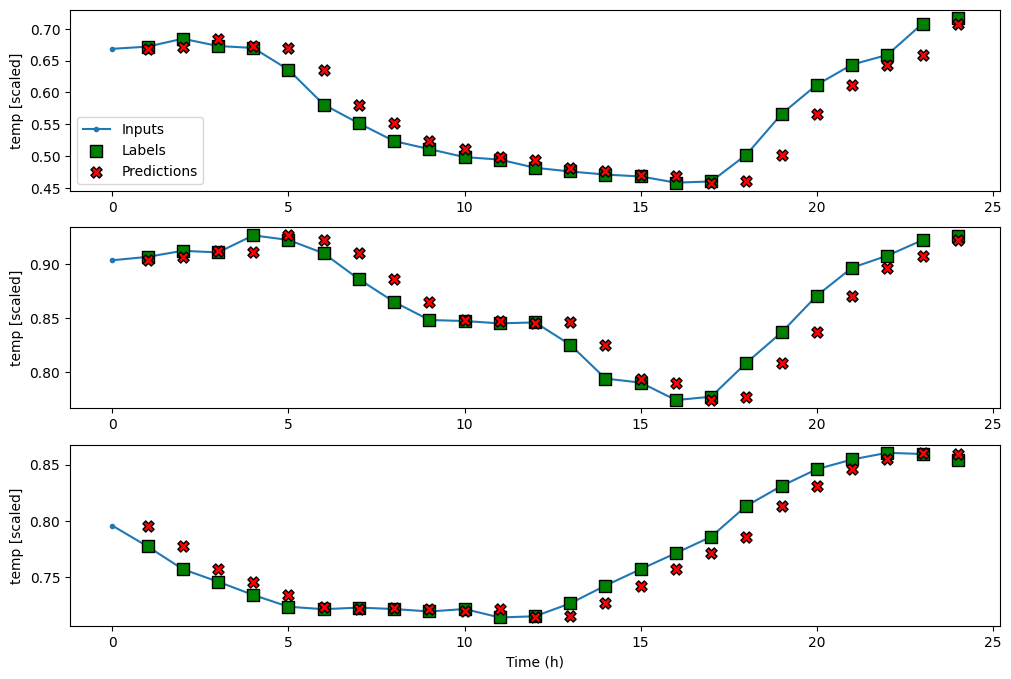

In [ ]:
mo_wide_window.plot(model=mo_baseline_last, plot_col='temp')

+ **Figura 13.13 Predicción del último valor conocido de la temperatura. Las predicciones (cruces) son iguales al punto de datos anterior, por lo que nuestro modelo de referencia se comporta como se esperaba.**

In [ ]:
### **c. Error MAE**

In [ ]:
# Almacene el MAE de la línea base en el conjunto de prueba.
print(f'Para nuestro modelo de Referencia MAE multipaso el error absoluto es')
print(mo_performance['Baseline - Last'][1])

Para nuestro modelo de Referencia MAE multipaso el error absoluto es
0.04710666462779045


# **13.3 Próximos pasos**
+ En este capítulo, cubrimos el paso crucial de crear ventanas de datos, que nos permitirán construir rápidamente cualquier tipo de modelo.
+ Luego procedimos a construir modelos de referencia para cada tipo de modelo, de modo que tengamos puntos de referencia con los que podamos comparar cuando construyamos nuestros modelos más complejos en capítulos posteriores.
+ Por supuesto, la construcción de modelos de referencia todavía no es una aplicación del aprendizaje profundo.
+ En el próximo capítulo, implementaremos modelos lineales y redes neuronales profundas, y veremos si esos modelos ya tienen un mejor rendimiento que las líneas de base simples.

# **Resumen**
+ La creación de ventanas de datos es esencial en el aprendizaje profundo para dar formato a los datos como entradas y etiquetas para el modelo.
+ La clase DataWindow se puede usar fácilmente en cualquier situación y se puede ampliar a su gusto. Úsela en sus propios proyectos.
+ Los modelos de aprendizaje profundo requieren una función de pérdida y una métrica de evaluación.
+ En nuestro caso, elegimos el error cuadrático medio (MSE) como función de pérdida, porque penaliza los errores grandes y tiende a producir modelos con mejor ajuste.
+ La métrica de evaluación es el error absoluto medio (EMA), elegido por su facilidad de interpretación.